# Proyecto del Día 10 - Dashboard de un Análisis Exploratorio de Datos con Seaborn

## Introducción
Este notebook tiene como objetivo demostrar cómo utilizar Seaborn para **crear visualizaciones complejas y atractivas para el análisis exploratorio de datos** utilizando el dataset de `diamonds`, pertenenciente a la librería **Seaborn** en Python. Este dashboard incluirá visualizaciones que muestren:
* relaciones estadísticas
* distribuciones de variables
* comparaciones entre categorías

El estudiante deberá:
1. Cargar el dataset `diamonds` de Seaborn
2. Realizar un **análisis exploratorio** preliminar para familiarizarse con los datos
3. Crear visualizaciones que incluyan:
    * Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
    * Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
    * Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
4. Utilizar `jointplot()` para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional
5. Emplear `pairplot()` para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta
6. Ajustar los estilos y temas de las visualizaciones para mejorar la estética y legibilidad
7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos

No dejes de usar tu creatividad, explora, diviértete y en el medio de todo eso, aprende.

### 0. Cargar librerías

In [1]:
import pandas as pd
import seaborn as sns

### 1. Cargar el dataset `diamonds` de Seaborn

In [2]:
df: pd.DataFrame = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 2. Realizar un **análisis exploratorio** preliminar para familiarizarse con los datos

In [3]:
# Obtener información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
# Obtener descripción estadística del dataset
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Más info sobre este dataset:

- https://github.com/mwaskom/seaborn-data
- https://ggplot2.tidyverse.org/reference/diamonds.html
- https://www.geeksforgeeks.org/seaborn-datasets-for-data-science/#5-diamonds-dataset

In [5]:
# Obtener los distintos valores únicos de la columna 'cut'
cut_values: set = set(df['cut'].values)
print(cut_values)

{'Premium', 'Fair', 'Ideal', 'Very Good', 'Good'}


In [6]:
# Obtener los distintos valores únicos de la columna 'color'
color_values: set = set(df['color'].values)
print(color_values)

{'G', 'J', 'F', 'H', 'D', 'E', 'I'}


#### Investigación personal

Los colores de los diamantes (en realidad, variaciones tonales) se distinguen por un código de letras.

![Fuente: https://4cs.gia.edu/en-us/blog/diamond-color-chart-official-gia-color-scale/](https://4cs.gia.edu/wp-content/uploads/2024/07/04_Diamond-Color_D-Z_1920x865.jpg)

Más info en: https://en.wikipedia.org/wiki/Diamond_color

In [7]:
# Obtener los distintos valores únicos de la columna 'clarity'
clarity_values: set = set(df['clarity'].values)
print(clarity_values)

{'SI2', 'IF', 'I1', 'SI1', 'VS2', 'VVS1', 'VS1', 'VVS2'}


#### Investigación personal

De manera similar que en los colores, la claridad de los diamantes se distingue por un código específico:

![Fuente: https://www.rarecarat.com/education/diamonds-guide/diamond-clarity](https://assets-rarecarat.s3.amazonaws.com/images/blog/clarity-chart.jpg)

El concepto de "claridad" refiere a cuántas imperfecciones naturales hay presentes en la piedra, sean internas (en inglés: "inclusions") o en la superficie (en inglés: "blemishes").

Más info en: https://en.wikipedia.org/wiki/Diamond_clarity

### 3. Crear visualizaciones

In [8]:
# Establecer tema de Seaborn
sns.set_theme(
    style='darkgrid',
)

#### Relaciones entre variables numéricas

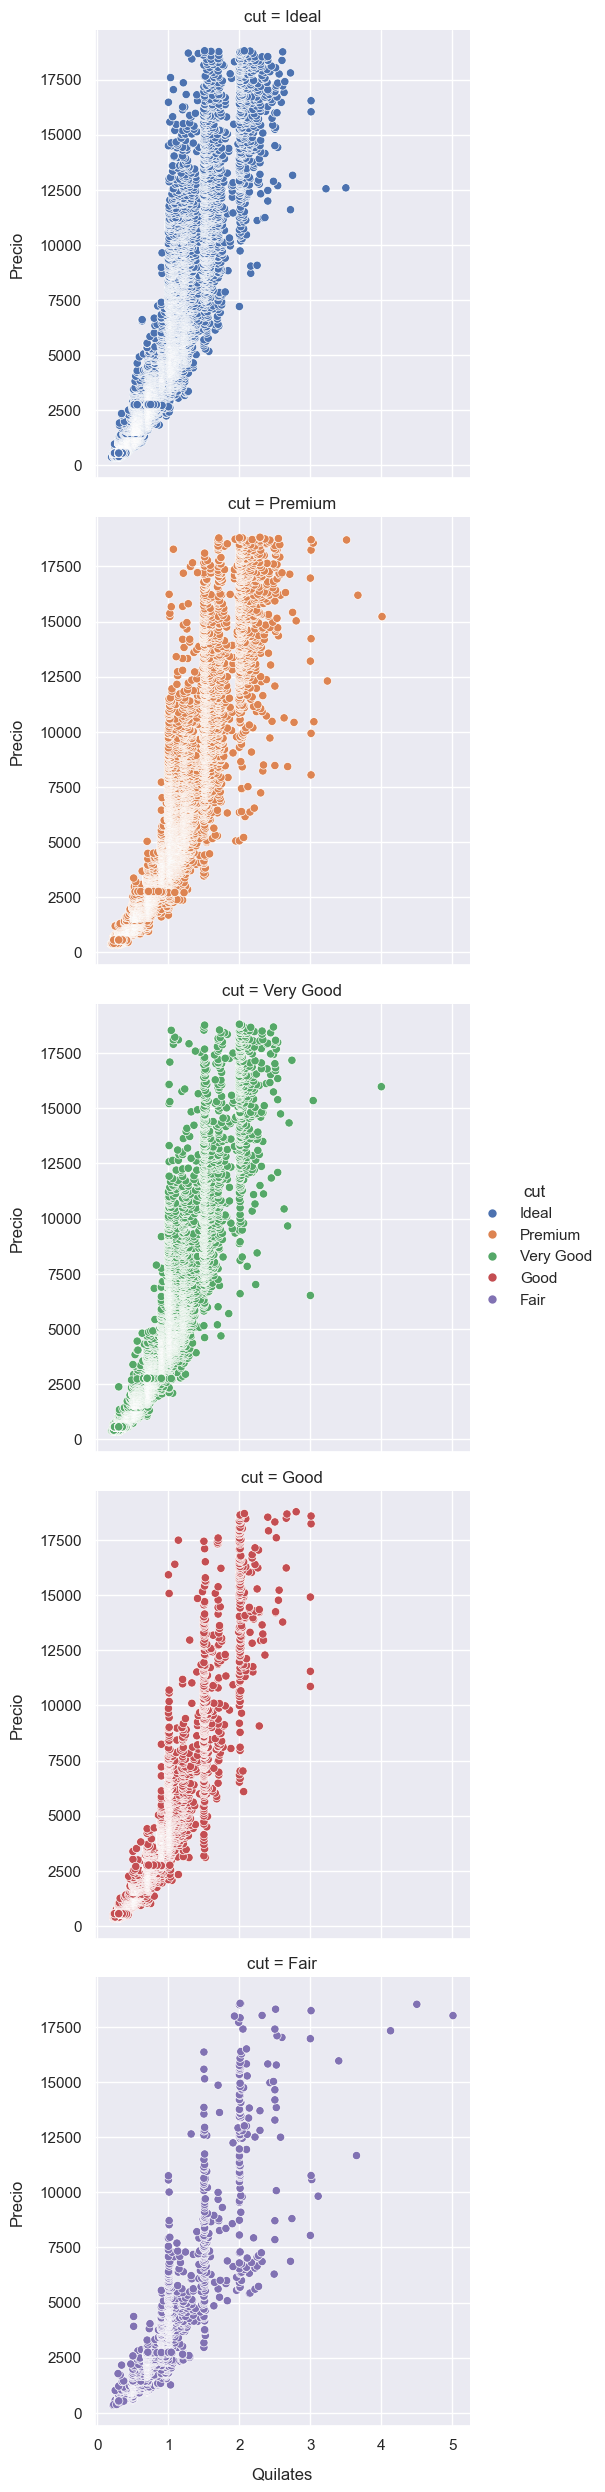

In [9]:
# Relación entre peso en quilates vs. precio
carat_vs_price: sns.FacetGrid = sns.relplot(
    data=df,
    x='carat',
    y='price',
    hue='cut',
    row='cut'
)

carat_vs_price.set_axis_labels(
    'Quilates',
    'Precio',
    labelpad=10
)

#### Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)

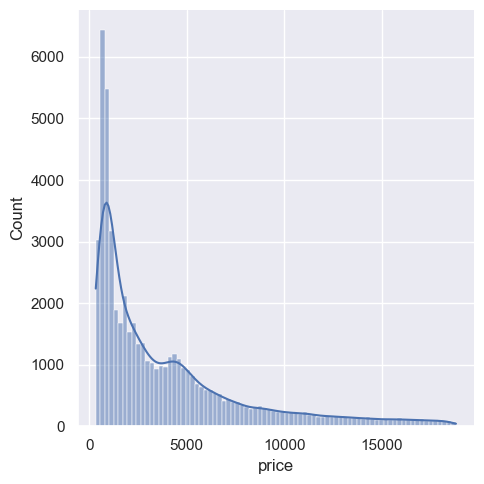

In [20]:
# Distribución del precio
dis_price: sns.FacetGrid = sns.displot(data=df, x='price', kde=True)

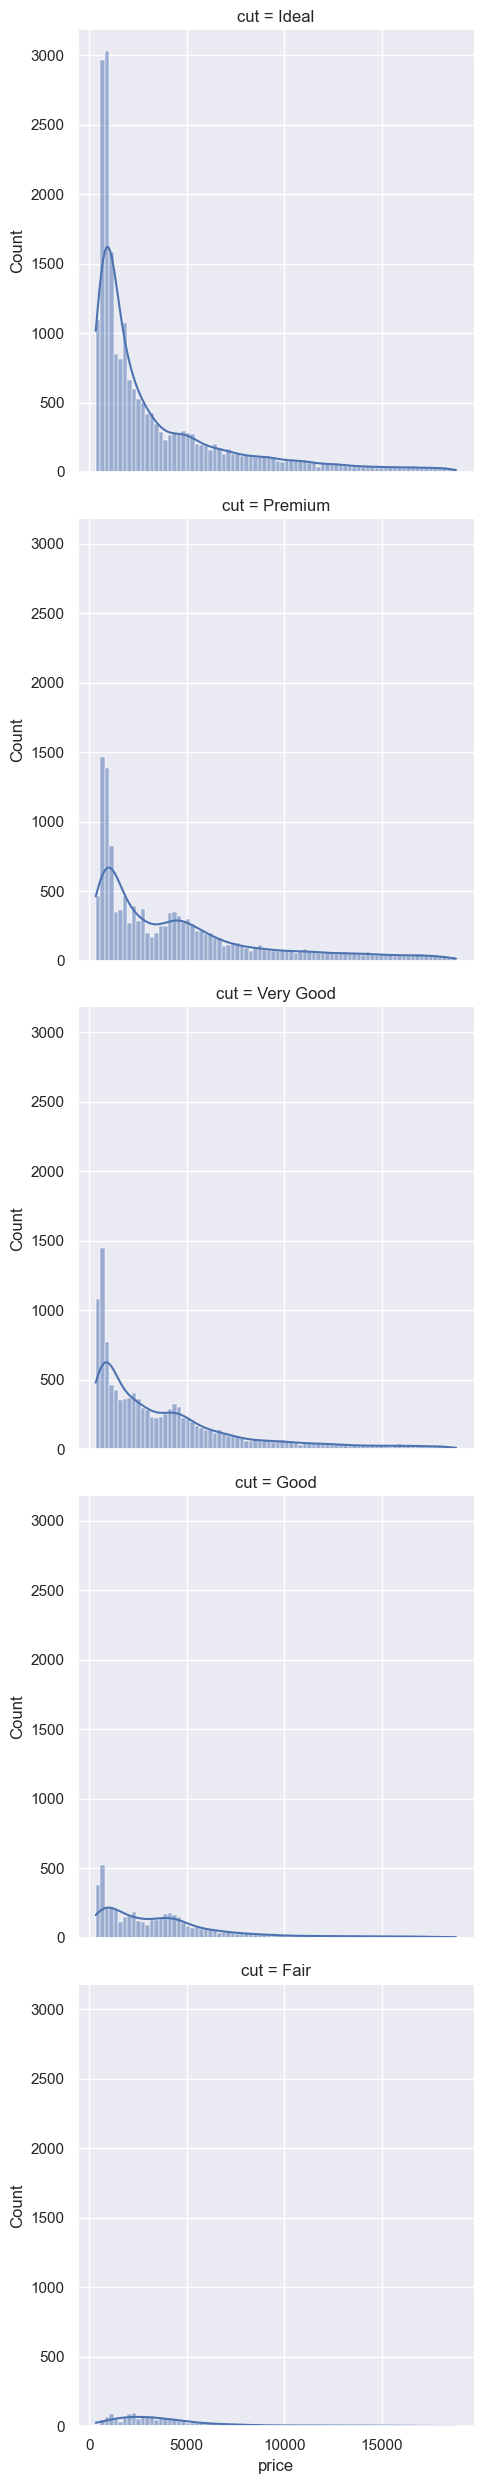

In [21]:
# Distribución del precio, según corte
dis_price_cut: sns.FacetGrid = sns.displot(
    data=df,
    x='price',
    kde=True,
    row='cut'
)

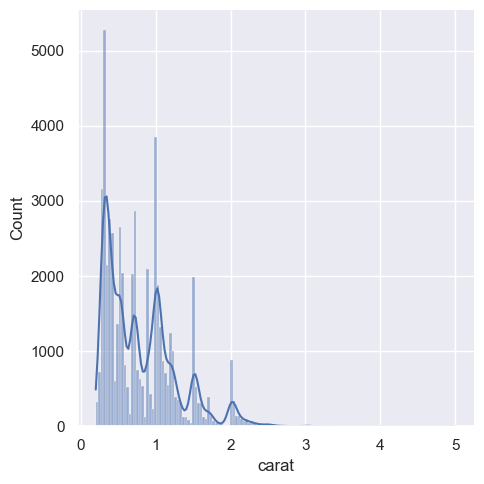

In [22]:
# Distribución del peso en quilates
dis_carat: sns.FacetGrid = sns.displot(data=df, x='carat', kde=True)

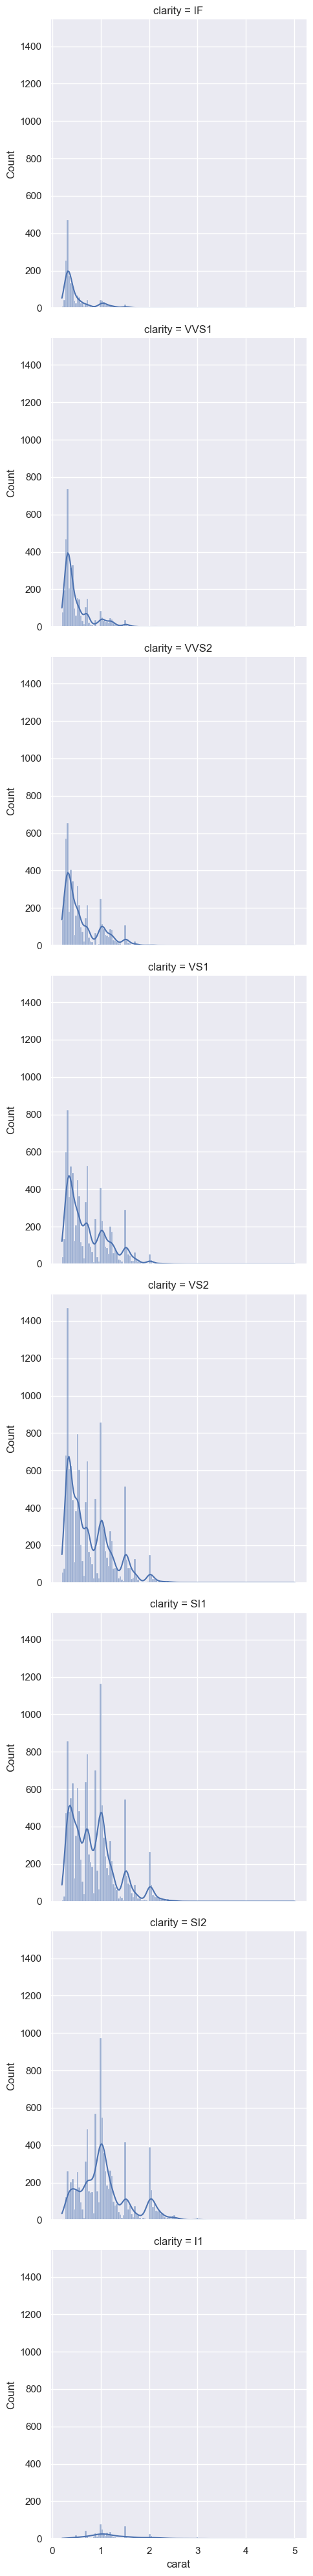

In [24]:
# Distribución del peso en quilates, según claridad
dis_carat_cut: sns.FacetGrid = sns.displot(
    data=df,
    x='carat',
    kde=True,
    row='clarity'
)